## **Import Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## **Load Data**

In [ ]:
data = pd.read_csv('Train.csv')
data.head()

,text,label
0,I grew up (b. 1965) watching and loving the Th...,0
1,"When I put this movie in my DVD player, and sa...",0
2,Why do people who do not know what a particula...,0
3,Even though I have great interest in Biblical ...,0
4,Im a die hard Dads Army fan and nothing will e...,1


## **Analyzing and  Preprocessing**

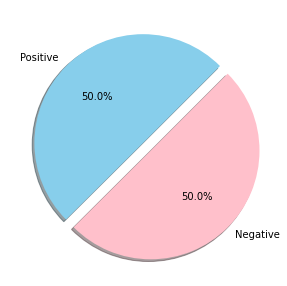

In [ ]:
fig = plt.figure(figsize=(5,5))
c = [data[data['label'] == 1]['label'].count(), data[data['label'] == 0]['label'].count()]
legpie=plt.pie(c,labels=["Positive","Negative"],
                 autopct ='%1.1f%%', 
                 shadow = True,
                 colors = ["skyblue",'pink'],
                 startangle = 45,
                 explode=(0, 0.1))

In [ ]:
import re
def cleanText(movieText):
    movieText = re.sub('http\S+\s*', ' ', movieText)  # remove URLs
    movieText = re.sub('RT|cc', ' ', movieText)  # remove RT and cc
    movieText = re.sub('#\S+', '', movieText)  # remove hashtags
    movieText = re.sub('@\S+', '  ', movieText)  # remove mentions
    movieText = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', movieText)  # remove punctuations
    movieText = re.sub(r'[^\x00-\x7f]',r' ', movieText) 
    movieText = re.sub('\s+', ' ', movieText)  # remove extra whitespace
    emojis=re.findall('(?::|;|=)(?:-)?(?:\)|\(|D|P)',movieText) #remove emoji
    movieText=re.sub('[\W]+',' ',movieText.lower()) +' '.join(emojis).replace('-','')
    return movieText
# Apply preprocessing to the dataset
data['text'] = data.text.apply(cleanText)

## **Simplify Data**

In [ ]:
from nltk.stem.porter import PorterStemmer
porter=PorterStemmer()
def tokenizer(movieText):
        return movieText.split()
def tokenizer_porter(movieText):
    return [porter.stem(word) for word in movieText.split()]

## **Visualization of Positive and negative Words**

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
Positive words are as follows


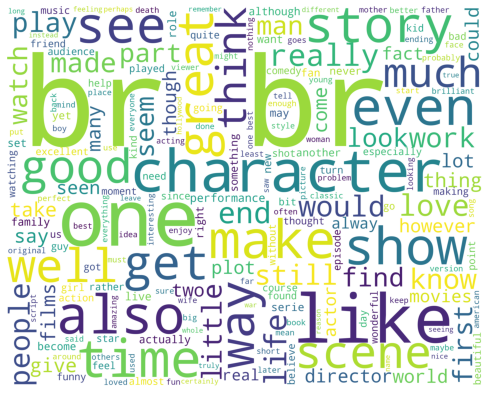

Negative words are as follows


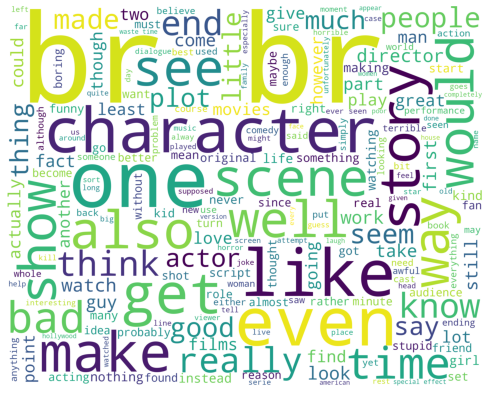

In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop=stopwords.words('english')

from wordcloud import WordCloud
positivedata = data[ data['label'] == 1]
positivedata =positivedata['text']
negdata = data[data['label'] == 0]
negdata= negdata['text']

def wordcloud_draw(data, color = 'white'):
    words = ' '.join(data)
    cleaned_word = " ".join([word for word in words.split()
                              if(word!='movie' and word!='film')
                            ])
    wordcloud = WordCloud(stopwords=stop,
                      background_color=color,
                      width=2500,
                      height=2000
                     ).generate(cleaned_word)
    plt.figure(1,figsize=(10, 7))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()
    
print("Positive words are as follows")
wordcloud_draw(positivedata,'white')
print("Negative words are as follows")
wordcloud_draw(negdata)

## **Convert Word to Vector**

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf=TfidfVectorizer(strip_accents=None,lowercase=False,preprocessor=None,tokenizer=tokenizer_porter,use_idf=True,norm='l2',smooth_idf=True)
y=data.label.values
x=tfidf.fit_transform(data.text)

## **Split dataset in Tain and Test Set**

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,random_state=1,test_size=0.5,shuffle=False)

## **Train and Test Model**

In [ ]:
from sklearn.linear_model import LogisticRegressionCV
clf=LogisticRegressionCV(cv=6,scoring='accuracy',random_state=0,n_jobs=-1,verbose=3,max_iter=500).fit(X_train,y_train)
y_pred = clf.predict(X_test)
from sklearn import metrics
# Model Accuracy
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:  3.0min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:  3.0min finished


Accuracy: 0.8915
